In [3]:
# >> conda install tensorflow=1.14.0
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
# 데이터 타입
import tensorflow as tf

# tensorflow 변수 - constant, variables, placeholder
hello = tf.constant("Hello, TensorFlow!") # 상수 선언

sess = tf.Session()
print(hello) # tensorflow의 데이터는 직접 확인이 불가하다.
print(sess.run(hello)) # numpy데이터로 변환하여 출력된다.

C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages

Tensor("Const:0", shape=(), dtype=string)
b'Hello, TensorFlow!'


C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_08\Anaconda3\envs\tf_t

In [107]:
x = tf.constant(35, name = "x")
# 모델의 그라프 구조 확인
# 모델을 그대로 저장할 때 메모리 위치를 확인하기 위해서
y = tf.Variable(x+5, name = "y") # 변수가 있는 경우 반드시 초기화

print(y)

<tf.Variable 'y_1:0' shape=() dtype=int32_ref>


In [7]:
model = tf.global_variables_initializer() # 변수초기화
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [11]:
# Pandas에서 데이터 초기화 -> list, dict에 담아서
# 요소끼리 계산(행렬연산X, 배열 연산)
a = tf.constant([1,2,3], name = "a") # GPU
b = tf.constant([4,5,6], name = "b")
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [14]:
# 자료구조가 Graph로 구성되어진다.
# 여기서는 구조만 만드는 것이다.(계산구조, Graph구조)
#  -> session이 연결되어야 수행
a = tf.placeholder(tf.int16) #  데이터 없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)

In [18]:
# with가 끝나면 sess는 사라짐
with tf.Session() as sess:
    print("feed 변수 합 %i" % sess.run(add, # 데이터 주입 호출
                                   feed_dict = {a:2, b:3}))
    print("feed 변수 곱 %i" % sess.run(mul,
                                   feed_dict = {a:2, b:3}))
    print("feed 변수 곱 %i" % sess.run(total,
                                   feed_dict = {a:1, b:2})) # add, mul 다 호출함

feed 변수 합 5
feed 변수 곱 6
feed 변수 곱 6


In [20]:
matrix1 = tf.constant([[3., 3.]]) # 1x2
matrix2 = tf.constant([[2.], [2.]]) # 2x1
product = tf.matmul(matrix1, matrix2) # 행렬곱

with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


In [68]:
zeros = tf.zeros([2,2]) # 0
ones = tf.ones([6]) # 1
# 균등분포
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10)
# 정규분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0)
#표준편차 2배 내의 것으로 초기화
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [69]:
sess = tf.Session()
print(sess.run(trunc))

init = tf.global_variables_initializer() # 변수초기화
sess.run(init)
print("변수초기화", sess.run(random_var))

[[6.1066513 6.233135 ]
 [4.6417885 5.8903728]]
변수초기화 [[-0.48440027 -0.88966125]
 [ 0.9074482   0.9246764 ]]


In [37]:
import tensorflow as tf
my_tensor = tf.constant(0, shape=[6,2]) # 6x2행렬 => 상수화
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape))
print(my_static_shape) # 내용은 run으로 확인, shape는 get_shape()로 확인

my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [39]:
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval()) # interactive session일 경우에는 eval() 쓰면 내용을 확인할 수 있다.(run() 안 사용해도)

[0. 0.]


C:\Users\ICT01_08\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [45]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    print(t.eval())
    sess.close()

In [47]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.constant([2.3, 4.5]), tf.constant([-2, 3, 5])
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3])) # 여러개가 가능하도록 함

[ 3.5 10.1]
[-8  5 17]


In [71]:
#  2x +  y +  z =  1
#  4x + 3y + 4z =  2
# -4x + 2y + 2z = -6
# A dot x = [1, 2, -6] # 행렬나누기 -> 역행렬 곱
#       y
#       z
sess = tf.Session()
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape=[3,3])
print(sess.run(x))

y = tf.constant([1.0,2,-6], shape=[3,1])
print(sess.run(y))

z = tf.matrix_solve(x, y) # x의 역행렬을 구하고 y와 행렬곱(matrix_inverse(x) -> matmul(x_1, y)의 결과와 같음)
result = sess.run(z)
print("\n계수:\n", result)
print(sess.run(z)) # 1, -2, 1
# 검산
# 2*1 + (-2) + 1 = 1

print("1)2x +  y +  z =  1 검산=>", 2.0 * result[0] + 1.0 * result[1] + 1.0 * result[2])
print("2)3개 방정식 검산=>\n", sess.run(tf.matmul(x, z)))

x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y)
print("해:\n", sess.run(z)) # 1, -2, 1

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]

계수:
 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
1)2x +  y +  z =  1 검산=> [1.0000001]
2)3개 방정식 검산=>
 [[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]
해:
 [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [79]:
# svd(Singular Value decomposition)
# PCA - 고윳값 분해 eigenvalue + eigenvector : 정방행렬에만 가능(행과 열의 수가 같은)
a = tf.constant([1, 2, 3 ,4, 5, 6], shape=[2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑음
# 정방행렬
# truncate : 
s, u, v = tf.svd(a) # singular value, u(2x2), s(1x2), v(3x2)
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))

[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [84]:
# 대각행렬
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 - One-hot-encoding
print(sess.run(dia))
print("diag_part(dia) :", sess.run(tf.diag_part(dia))) # 대각선요소만
print("trace(dia) :", sess.run(tf.trace(dia))) # 대각요소의 합

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
diag_part(dia) : [1 2 3 4]
trace(dia) : 10


In [13]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a, b)
sess.run(c)

array([[ 58,  64],
       [139, 154]])

In [14]:
# 행열 : 행과 열을 확인하고 앞의 것은 개수(어떻게 층을 이루고 있는가)
a = tf.constant(np.arange(1, 13, dtype=np.int32), shape=[2,2,3]) # 두번째 세번째 인덱스만(2x3), 행렬을 중심하고 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(13, 25, dtype=np.int32), shape=[2,3,2]) # 두번째 세번째 인덱스만(3x2)
print(sess.run(b))
c = tf.matmul(a, b)
sess.run(c) # 2x2x2

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [15]:
a = tf.constant(np.arange(1, 25, dtype=np.int32), shape=[2, 2, 2, 3]) # 두번째 세번째 인덱스만(2x3), 행렬을 중심하고 데이터 표현
print("run(a) >>\n", sess.run(a))
b = tf.constant(np.arange(25, 49, dtype=np.int32), shape=[2, 2, 3, 2]) # 두번째 세번째 인덱스만(3x2)
print("\nrun(b) >>\n",sess.run(b))
c = tf.matmul(a, b)

print("\nrun(c) >>\n",sess.run(c)) # 2x2 => 4개

run(a) >>
 [[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]

run(b) >>
 [[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]

run(c) >>
 [[[[ 166  172]
   [ 409  424]]

  [[ 796  820]
   [1093 1126]]]


 [[[1642 1684]
   [1993 2044]]

  [[2704 2764]
   [3109 3178]]]]


In [16]:
# a를 제곱한다면 : 자기 자신을 제곱하려면 전치시켜야 한다.
d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a, a, transpose_b= True) # 전치해서 자기제곱

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_4:0' shape=(2, 2, 2, 2) dtype=int32>

In [20]:
# 0 1 2 4
# 4x2x2x3
x = tf.constant([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x))

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [23]:
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [25]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [31]:
t = [1,2,3,4,5,6]
t = tf.reshape(t, [1,2,1,3,1,1])
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [33]:
print("t의 차원은", sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [35]:
print("차원의 수를 축소할 때 : ", sess.run(tf.shape(tf.squeeze(t))))
# 요소 수가 1개인 차원을 모두 없애버림
# => [1 2 1 3 1 1] 이 차원에서는 1 다 없애고, 2,3만 남음

차원의 수를 축소할 때 :  [2 3]


In [40]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print("sess.run(tf.reshape(tensor, [2, -1]))")
print(sess.run(tf.reshape(tensor, [2, -1])))
tf.reshape(tensor, [-1, 6])
print("\nsess.run(tf.reshape(tensor, [2, -1,3]))")
print(sess.run(tf.reshape(tensor, [2, -1,3])))

sess.run(tf.reshape(tensor, [2, -1]))
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

sess.run(tf.reshape(tensor, [2, -1,3]))
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [43]:
# t = [1 2 1 3 1 1] -> 차원확대 => 1, 1, 2, 1, 3, 1, 1(맨 앞에 1추가)
print(tf.expand_dims(t, 0)) # 차원 확대

Tensor("ExpandDims_2:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [50]:
# padding 충전재
t = [[1,2,3], [4,5,6]] # 2x3
paddings = [[1,1,],[2,2]] # 2x3 => 4x7
print(sess.run(tf.pad(t, paddings, "constant")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [52]:
# 수를 채우는 방법
paddings = [[1,1,], [1,1]] # 4x5
print(sess.run(tf.pad(t, paddings, "reflect")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [55]:
print(sess.run(tf.pad(t, paddings, "symmetric")))

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


In [ ]:
# 다차 방정식의 해
#  - 무작위 대입법
#  - 역행렬을 구함(계수, y값이 다 결정되었을 경우 사용)
#
# 입출력 데이터만 아는 경우에는?
#   => 가중치 학습을 통해서 학습 -> 계수 결정

In [57]:
import numpy as np
import tensorflow as tf

# 데이터 생성 => minibatch -> feeding
x_data = np.random.rand(100).astype(np.float32)
y_data= x_data * 0.1 + 0.3 # y_data:실제값
len(y_data)

100

In [76]:
# 설명력
# bias 는 activation 활성화
# 가중치에는 꼭 bias가 1개씩 결합
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 가중치(균등분포)
b = tf.Variable(tf.zeros([1])) # bias
sess = tf.Session()
y_model = W * x + b # 예측함수(y:예측치)

In [77]:
# loss function - MSE(2차원인 경우 포물선을 이루고 최적점은 1개)
loss = tf.reduce_mean(tf.square(y_model - y)) # MSE, reduce_mean:전부 더하여 평균을 구함
# 경사하강법
# 기울기 : 미분을 이용해서 => 기울기가 -(음)이면 가중치에 차를 더함
#                          => 기울기가 +(양)이면 가중치에 감함
optimizer = tf.train.GradientDescentOptimizer(0.5) # 학습율:0.5
train = optimizer.minimize(loss) # minimize : loss함수를 최적화

In [78]:
init = tf.global_variables_initializer()
sess.run(init)

In [88]:
for step in range(201):
    sess.run(train, {x:x_data, y:y_data})
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [0.1000001] [0.29999995]
20 [0.1000001] [0.29999995]
40 [0.1000001] [0.29999995]
60 [0.1000001] [0.29999995]
80 [0.1000001] [0.29999995]
100 [0.1000001] [0.29999995]
120 [0.1000001] [0.29999995]
140 [0.1000001] [0.29999995]
160 [0.1000001] [0.29999995]
180 [0.1000001] [0.29999995]
200 [0.1000001] [0.29999995]


In [92]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

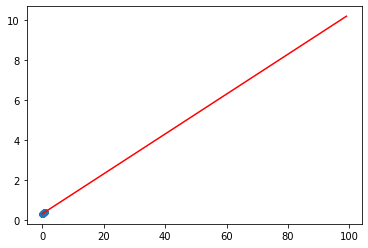

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, "o", markersize = 5)
plt.plot(predicted, "r")
plt.show()

In [99]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [100]:
sess = tf.Session()
x_vals = np.array([1., 3., 5., 7., 9.])
y_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals :
    print(sess.run(prod, feed_dict = {x_data: x_val, y_data: y_vals}))
    

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [105]:
merged = tf.summary.merge_all()
if not os.path.exists("c://tmp/tensorboard_logs/"):
    os.makedirs("c://tmp/tensorboard_logs/")
    
my_writer = tf.summary.FileWriter("c://tmp/tensorboard_logs/", sess.graph)
# anaconda prompt에서
# tensorboard --logdir=/tmp
# 결과출력 URL
# http://localhost:6006/

In [107]:
import numpy
rng = numpy.random

learning_rate = 0.01
training_epochs = 4000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [123]:
n_samples = train_X.shape[0] # 차수 [0]:행의 수=>Data Point(관측치), [1]:열의 수=>변수의 개수
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
activation = tf.add(tf.multiply(X, W), b) # y = ax + b (activation:예측치)
# minibatch size를 고려
cost = tf.reduce_sum(tf.pow(activation-Y, 2)) / (2*n_samples)

# 역전파
# momentum: 가던 방향으로 데이터를 고려
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # learning_rate - hyper parameter
init = tf.initialize_all_variables()

Epoch: 0001 cost= 27.891872406 W= -0.6249829 b= -0.9113383
Epoch: 0051 cost= 0.209601864 W= 0.4531931 b= -0.66321415
Epoch: 0101 cost= 0.194279894 W= 0.4410841 b= -0.5761026
Epoch: 0151 cost= 0.180727378 W= 0.42969528 b= -0.49417245
Epoch: 0201 cost= 0.168739885 W= 0.41898373 b= -0.41711465
Epoch: 0251 cost= 0.158136785 W= 0.40890938 b= -0.34464008
Epoch: 0301 cost= 0.148758233 W= 0.39943412 b= -0.27647546
Epoch: 0351 cost= 0.140462920 W= 0.39052242 b= -0.21236536
Epoch: 0401 cost= 0.133125678 W= 0.38214073 b= -0.15206796
Epoch: 0451 cost= 0.126635954 W= 0.3742575 b= -0.09535684
Epoch: 0501 cost= 0.120895892 W= 0.3668432 b= -0.04201854
Epoch: 0551 cost= 0.115818925 W= 0.3598698 b= 0.008147477
Epoch: 0601 cost= 0.111328460 W= 0.3533111 b= 0.05533
Epoch: 0651 cost= 0.107356831 W= 0.34714252 b= 0.09970626
Epoch: 0701 cost= 0.103844076 W= 0.3413409 b= 0.14144316
Epoch: 0751 cost= 0.100737207 W= 0.3358842 b= 0.18069804
Epoch: 0801 cost= 0.097989373 W= 0.3307521 b= 0.21761817
Epoch: 0851 cos

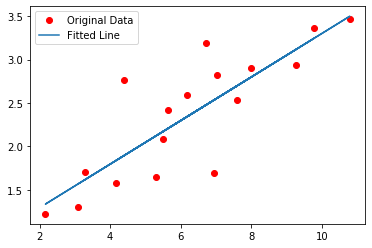

In [125]:
# session을 연결하기 전까지는 graph를 정의
# node( 연산 ) + edge( 데이터 전달 : tensor(배열적 요소 + 행렬적 요소) )
# 전제조건 : GPU가 존재한다. => GPU와 CPU를 네트워크로 연결한다.
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for(x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            
        # accuracy : 점점 증가
        if epoch % display_step == 0: # 비용함수 : 점점 감소(우하향곡선)
            print("Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})),
                 "W=", sess.run(W), "b=", sess.run(b))
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y:train_Y}), "W=", sess.run(W), "b=", sess.run(b)) # 수렴값
    plt.plot(train_X, train_Y, "ro", label="Original Data")
    
    # predict 한 결과값 출력
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = "Fitted Line")
    plt.legend()
    plt.show()

In [128]:
# tensor - 직접 시각화하는 것이 불가능하다. => numpy format으로 변환한다.
import tensorflow as tf
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [132]:
my_distribution = tf.random_uniform((600,400), seed=42) # 전체 데이터수 24개
uniform = run_variable(my_distribution)

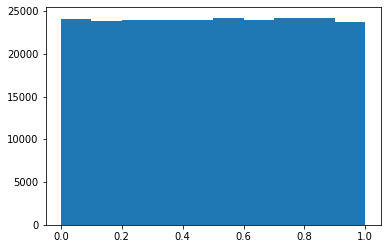

In [134]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 1차원으로 데이터 생성(데이터가 메모리 저장되는 방식 1차원)
plt.show()
# 데이터 개수에 따라 균등분포를 이루기도 하고 이루지 않기도 한다.

In [171]:
# activation 함수 : 회귀인지 분류인지를 결정
#  - 비선형 매핑 : 선형대수->비선형문제로 변경
#  - 가중치를 깊게하고, 활성화함수 매핑으로 XOR문제를 해결
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그라프 초기화
sess = tf.Session()

x_vals = np.linspace(start = -10., stop = 10., num = 100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93

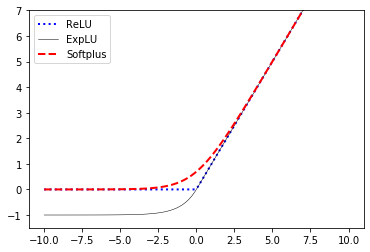

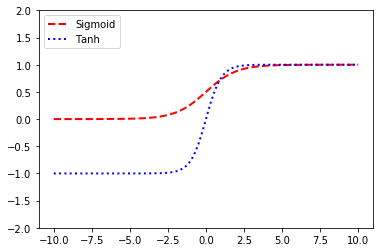

In [172]:
# ReLU
print(sess.run(tf.nn.relu([-3., 3., 10.]))) # 0 ~ oo(무한대)
y_relu = sess.run(tf.nn.relu(x_vals))

# Sigmoid
print(sess.run(tf.nn.sigmoid([-1., 0., 1.]))) # 0 ~ 1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

# Tanh
print(sess.run(tf.nn.tanh([-1., 0., 1.]))) # -1 ~ 1
y_tanh = sess.run(tf.nn.tanh(x_vals))

# ExpLU
print(sess.run(tf.nn.elu([-1., 0., 1.]))) # -1 ~ oo(무한대) (elu는 relu의 수정본)
y_elu = sess.run(tf.nn.elu(x_vals))

# Softplus
print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # 각진 단점 보완
y_softplus = sess.run(tf.nn.softplus(x_vals))

print(y_elu)
print(y_softplus)

plt.plot(x_vals, y_relu, "b:", label="ReLU", linewidth=2)
plt.plot(x_vals, y_elu, "k-", label="ExpLU", linewidth=0.5)
plt.plot(x_vals, y_softplus, "r--", label="Softplus", linewidth=2)
plt.ylim([-1.5, 7])
plt.legend(loc="upper left")
plt.show()

plt.plot(x_vals, y_sigmoid, "r--", label="Sigmoid", linewidth=2)
plt.plot(x_vals, y_tanh, "b:", label="Tanh", linewidth=2)
plt.ylim([-2, 2])
plt.legend(loc="upper left")
plt.show()

In [173]:
ops.reset_default_graph() # 그라프 초기화
sess = tf.Session()

# seed값 초기화
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))  # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)

# shape=[None, 1] : placeholder 크기를 fix하지 않고 입력데이터로부터 계산
# 행데이터로 생성
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [174]:
# y = ax + b
# sigmoid:0 ~ 1값으로 mapping
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# relu : 0 ~ oo(무한대)값으로 mapping
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
# 0.75로 수렴하는 과정
# MSE를 사용
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print("\n Sigmod AND Relu 함수의 최적화 0.75")


 Sigmod AND Relu 함수의 최적화 0.75


In [175]:
# loss 값을 저장하기 위한 배열
loss_vec_sigmoid = []
loss_vec_relu = []

0 sigmoid = 0.12655206 relu = 2.0227606
50 sigmoid = 0.17863758 relu = 0.7530296
100 sigmoid = 0.24769813 relu = 0.7492897
150 sigmoid = 0.3446748 relu = 0.7499546
200 sigmoid = 0.4400661 relu = 0.7539999
250 sigmoid = 0.5236898 relu = 0.754772
300 sigmoid = 0.58373857 relu = 0.7508698
350 sigmoid = 0.62733483 relu = 0.7470234
400 sigmoid = 0.6549499 relu = 0.75180537
450 sigmoid = 0.67452586 relu = 0.75470716


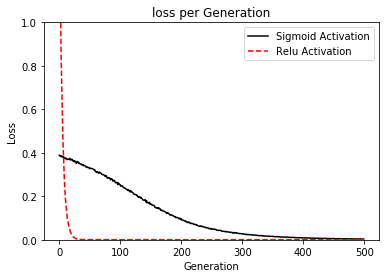

In [176]:
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]]) # 모양을 맞추기 위해
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i % 50 == 0:
        print(i, "sigmoid = " + str(np.mean(sigmoid_output)) + " relu = " + str(np.mean(relu_output)))
        
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 